In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("musteriler.csv")

In [7]:
df.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [8]:
df.info(
)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   Cinsiyet  200 non-null    object
 2   Yas       200 non-null    int64 
 3   Hacim     200 non-null    int64 
 4   Maas      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
df.describe()

,No,Yas,Hacim,Maas
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,46.155000,53620.500000,5954.375000
std,57.879185,17.492309,34855.146477,1777.210276
min,1.000000,19.000000,0.000000,2600.000000
25%,50.750000,30.000000,26575.000000,4550.000000
50%,100.500000,47.000000,46400.000000,5775.000000
75%,150.250000,63.000000,78225.000000,7431.250000
max,200.000000,75.000000,143500.000000,10075.000000


In [10]:
X = df.iloc[:,3:].values


In [11]:
from sklearn.cluster import KMeans
kmenas = KMeans(n_clusters=3 , init='k-means++')
kmenas.fit(X)

KMeans(n_clusters=3)

In [12]:
print(kmenas.cluster_centers_) # merkezlerinin nerede oluştuğunu gösteriyoruz

[[104386.95652174   7289.13043478]
 [ 22282.55813953   5310.75581395]
 [ 58911.76470588   5865.44117647]]


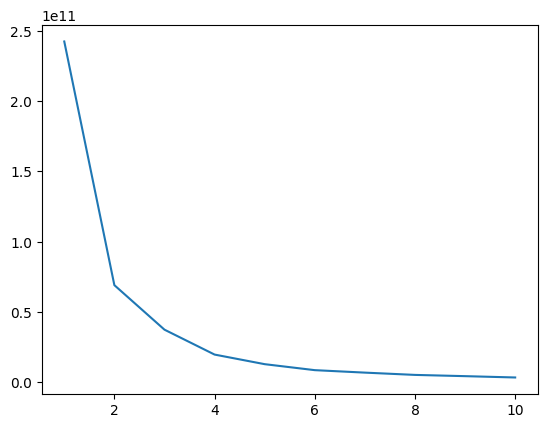

In [13]:
sonuclar = []

for i in range(1,11):
    kmenas = KMeans(n_clusters=i , init='k-means++' , random_state=123)
    kmenas.fit(X)
    sonuclar.append(kmenas.inertia_) # WCSS degerlerini aldık

plt.plot(range(1,11) , sonuclar)
plt.show()

[3 3 3 2 2 2 2 3 2 0 0 3 0 2 3 1 3 2 3 3 2 2 3 0 1 0 2 3 2 0 2 0 0 3 0 0 0
 2 0 1 3 2 3 2 2 0 0 0 0 1 2 3 1 1 3 3 2 3 0 3 1 3 0 2 0 2 0 3 0 2 3 3 3 3
 2 2 1 3 0 2 2 2 0 0 1 3 3 0 2 2 3 2 1 0 2 0 2 3 2 2 0 1 3 2 2 3 3 0 0 1 1
 3 3 3 3 0 2 3 0 0 2 0 3 3 3 0 2 2 1 2 2 0 0 0 0 2 0 0 3 0 3 2 0 0 3 0 2 0
 0 2 0 0 3 2 0 1 2 0 1 2 0 2 2 0 2 0 0 3 2 2 3 2 2 0 0 2 2 0 1 0 0 3 0 1 3
 1 2 2 0 2 0 2 0 3 2 3 3 0 0 0]


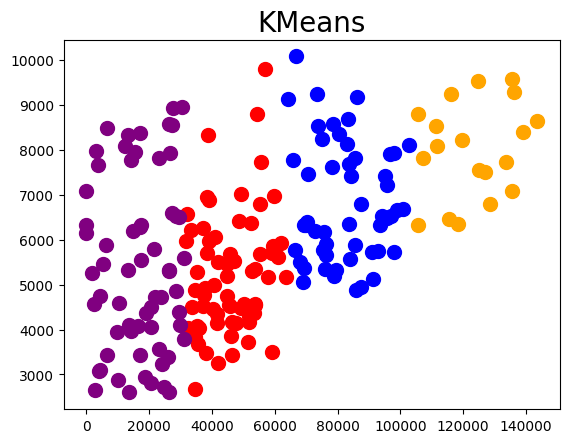

In [23]:
kmenas = KMeans(n_clusters=4 , init='k-means++' , random_state=123)
Y_tahmin = kmenas.fit_predict(X)
print(Y_tahmin)
plt.scatter(X[Y_tahmin==0,0] , X[Y_tahmin==0,1] , s=100 , c='red')
plt.scatter(X[Y_tahmin==1,0] , X[Y_tahmin==1,1] , s=100 , c='orange')
plt.scatter(X[Y_tahmin==2,0] , X[Y_tahmin==2,1] , s=100 , c='purple')
plt.scatter(X[Y_tahmin==3,0] , X[Y_tahmin==3,1] , s=100 , c='blue')
plt.title('KMeans' , fontsize=20)
plt.show()

<span style="color:#ef4444; font-weight:700; font-size:50px;">Hiyerarşik kümeleme (Hierarchical Clustering)</span>


In [14]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3 , metric='euclidean' , linkage='ward')

In [15]:
Y_tahmin = ac.fit_predict(X)
print(Y_tahmin)

[0 0 0 2 2 2 2 0 2 1 1 0 1 2 0 0 0 2 0 0 2 2 0 1 0 1 2 0 2 1 2 1 1 0 1 1 1
 2 1 0 0 2 0 2 2 1 1 1 1 0 2 0 0 0 0 0 2 0 1 0 0 0 1 2 1 2 1 0 1 2 0 0 0 0
 2 2 0 0 1 2 2 2 1 1 0 0 0 1 2 2 0 2 0 1 2 1 2 0 2 2 1 0 0 2 2 0 0 1 1 0 0
 0 0 0 0 1 2 0 1 1 2 1 0 0 0 1 2 2 0 2 2 1 1 1 1 2 1 1 0 1 0 2 1 1 0 1 1 1
 1 2 1 1 0 2 1 0 2 1 0 2 1 1 2 1 2 1 1 0 2 2 0 2 2 1 1 2 2 1 0 1 1 0 1 0 0
 0 2 2 1 2 1 2 1 0 2 0 0 1 1 1]


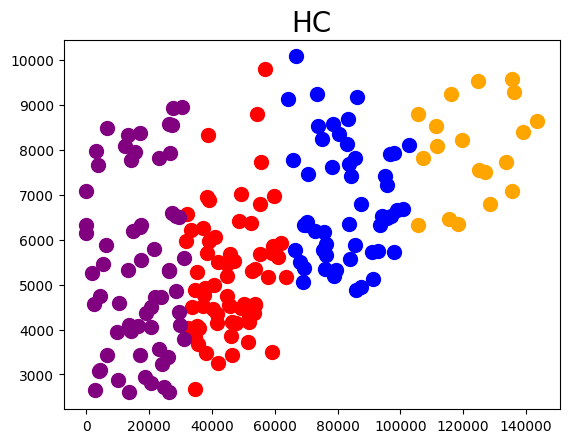

In [24]:
plt.scatter(X[Y_tahmin==0,0] , X[Y_tahmin==0,1] , s=100 , c='red')
plt.scatter(X[Y_tahmin==1,0] , X[Y_tahmin==1,1] , s=100 , c='orange')
plt.scatter(X[Y_tahmin==2,0] , X[Y_tahmin==2,1] , s=100 , c='purple')
plt.scatter(X[Y_tahmin==3,0] , X[Y_tahmin==3,1] , s=100 , c='blue')
plt.title('HC' , fontsize=20)
plt.show()

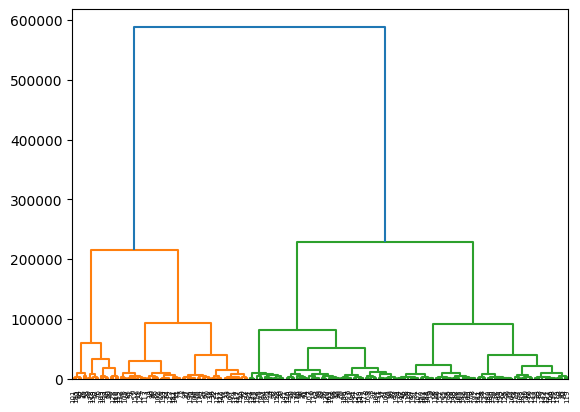

In [22]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X , method='ward'))
plt.show()